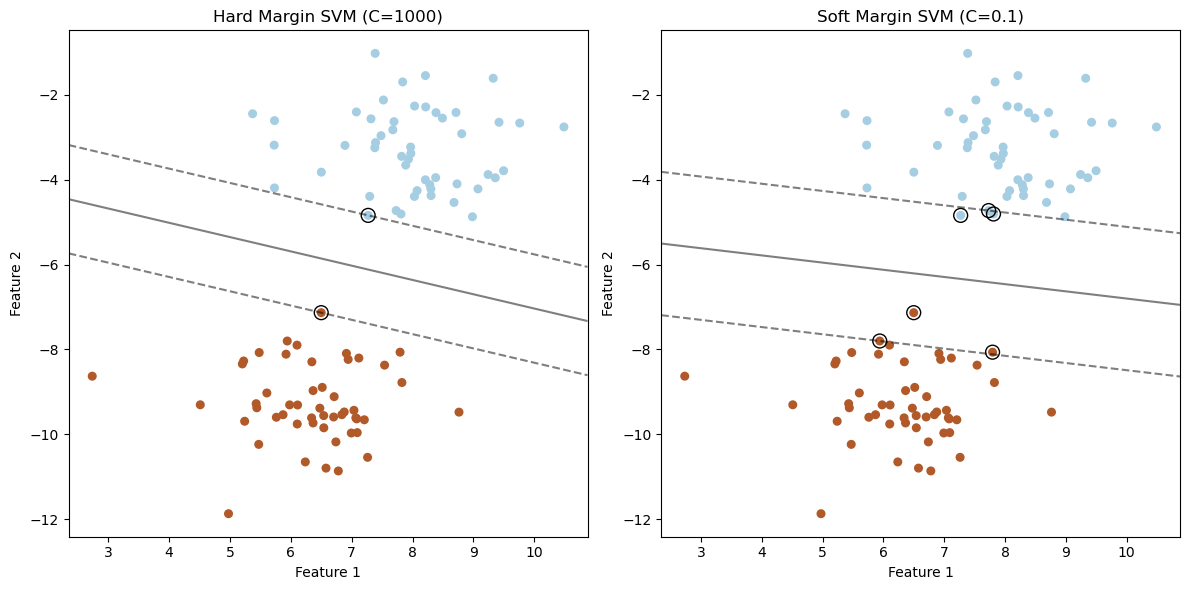

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 선형 분리 가능한 데이터 생성
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# 하드 마진 SVM
model_hard = svm.SVC(kernel='linear', C=1000)
model_hard.fit(X, y)

# 소프트 마진 SVM
model_soft = svm.SVC(kernel='linear', C=0.1)
model_soft.fit(X, y)

# 그래프를 그리기 위한 함수 정의
def plot_svm_model(model, subplot, title):
    plt.subplot(subplot)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그리드 생성
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # 결정 경계 및 마진 플롯
    ax.contour(XX, YY, Z,
               colors='k',
               levels=[-1, 0, 1],
               alpha=0.5,
               linestyles=['--', '-', '--'])

    # 서포트 벡터 표시
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=100,
               linewidth=1,
               facecolors='none',
               edgecolors='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plot_svm_model(model_hard, 121, 'Hard Margin SVM (C=1000)')
plot_svm_model(model_soft, 122, 'Soft Margin SVM (C=0.1)')
plt.tight_layout()
plt.show()

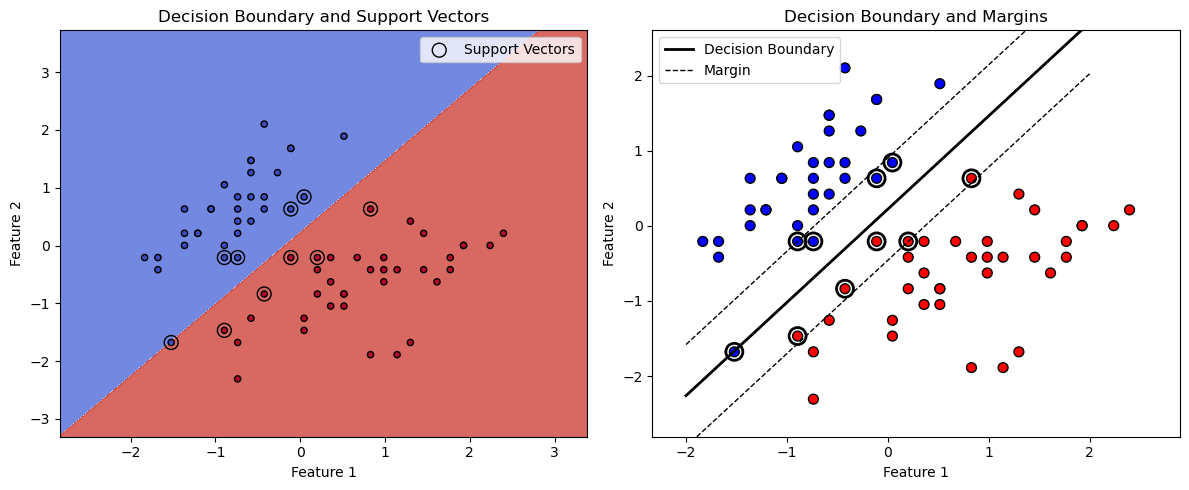

In [2]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 붓꽃 데이터셋을 로드합니다.
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 개의 특성만 사용
y = iris.target

# 두 개의 붓꽃 종만 선택 (예: setosa와 versicolor)
is_two_classes = (y == 0) | (y == 1)
X = X[is_two_classes]
y = y[is_two_classes]

# 데이터를 표준화합니다.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# SVM 모델을 생성하고 훈련합니다. 소프트 마진 설정을 사용합니다.
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# 첫 번째 그래프: 결정 경계와 서포트 벡터
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# 격자 위의 각 포인트에 대해 예측을 수행합니다.
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train, cmap=plt.cm.coolwarm,
    s=20, edgecolors='k'
)
plt.scatter(
    svm_model.support_vectors_[:, 0],
    svm_model.support_vectors_[:, 1],
    facecolors='none', edgecolors='black',
    s=100, label='Support Vectors'
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Support Vectors')
plt.legend()

# 두 번째 그래프: 결정 경계와 마진
plt.subplot(1, 2, 2)
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x0 = np.linspace(-2, 2, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
margin = 1 / w[1]
margin_up = decision_boundary + margin
margin_down = decision_boundary - margin

plt.plot(x0, decision_boundary, "k-", linewidth=2, label='Decision Boundary')
plt.plot(x0, margin_up, "k--", linewidth=1, label='Margin')
plt.plot(x0, margin_down, "k--", linewidth=1)
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train, cmap=plt.cm.bwr,
    s=50, edgecolors='k'
)
plt.scatter(
    svm_model.support_vectors_[:, 0],
    svm_model.support_vectors_[:, 1],
    facecolors='none', edgecolors='k',
    s=150, linewidths=2
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Margins')
plt.xlim(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5)
plt.ylim(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5)
plt.legend()

plt.tight_layout()
plt.show()

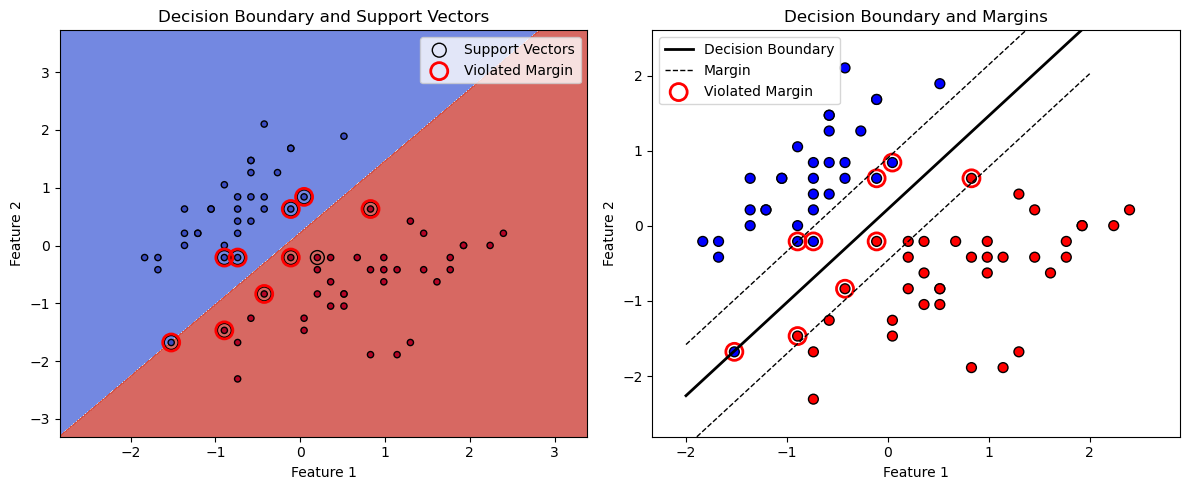

In [3]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 붓꽃 데이터셋을 로드합니다.
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 개의 특성만 사용
y = iris.target

# 두 개의 붓꽃 종만 선택 (예: setosa와 versicolor)
is_two_classes = (y == 0) | (y == 1)
X = X[is_two_classes]
y = y[is_two_classes]

# 데이터를 표준화합니다.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# SVM 모델을 생성하고 훈련합니다.
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# 첫 번째 그래프: 결정 경계와 서포트 벡터
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.01),
    np.arange(y_min, y_max, 0.01)
)

# 격자 위의 각 포인트에 대해 예측을 수행합니다.
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train, cmap=plt.cm.coolwarm,
    s=20, edgecolors='k'
)
plt.scatter(
    svm_model.support_vectors_[:, 0],
    svm_model.support_vectors_[:, 1],
    facecolors='none', edgecolors='black',
    s=100, label='Support Vectors'
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Support Vectors')
plt.legend()

# 서포트 벡터와 슬랙 변수 계산
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
distance_from_boundary = (
        y_train[svm_model.support_]
        * (np.dot(X_train[svm_model.support_], w) + b)
)
slack_variables = np.maximum(0, 1 - distance_from_boundary)

# 마진 위반 서포트 벡터 강조
plt.scatter(
    X_train[svm_model.support_][slack_variables > 0][:, 0],
    X_train[svm_model.support_][slack_variables > 0][:, 1],
    s=150, facecolors='none', edgecolors='red',
    linewidths=2, label='Violated Margin'
)
plt.legend()

# 두 번째 그래프: 결정 경계와 마진
plt.subplot(1, 2, 2)
x0 = np.linspace(-2, 2, 200)
decision_boundary = -w[0] / w[1] * x0 - b / w[1]
margin = 1 / w[1]
margin_up = decision_boundary + margin
margin_down = decision_boundary - margin

plt.plot(x0, decision_boundary, "k-", linewidth=2, label='Decision Boundary')
plt.plot(x0, margin_up, "k--", linewidth=1, label='Margin')
plt.plot(x0, margin_down, "k--", linewidth=1)
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train, cmap=plt.cm.bwr,
    s=50, edgecolors='k'
)
plt.scatter(
    X_train[svm_model.support_][slack_variables > 0][:, 0],
    X_train[svm_model.support_][slack_variables > 0][:, 1],
    s=150, facecolors='none', edgecolors='red',
    linewidths=2, label='Violated Margin'
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Margins')
plt.xlim(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5)
plt.ylim(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5)
plt.legend()

plt.tight_layout()
plt.show()

Accuracy: 0.98


/var/folders/8s/4g_l84wj1tjg71_xcwhr91yw0000gn/T/ipykernel_21519/4069236256.py:62: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


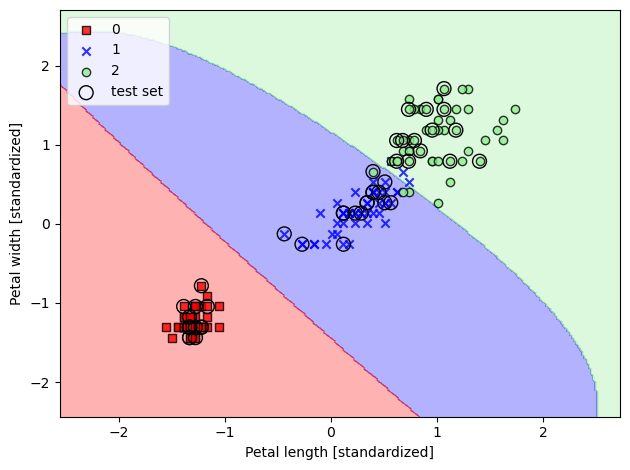

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 붓꽃 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # 꽃잎 길이와 너비를 특성으로 사용
y = iris.target

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

# 데이터 표준화
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

# 커널 SVM 모델 생성 및 학습
kernel_svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
kernel_svm.fit(X_train_std, y_train)

# 모델 평가
accuracy = kernel_svm.score(X_test_std, y_test)
print(f"Accuracy: {accuracy:.2f}")


# —————————————————————————————
# 결정 경계 시각화 함수
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors  = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    Z = classifier.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T
    )
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 각 클래스 샘플 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black'
        )

    # 테스트 세트만 강조
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c='none',
            edgecolor='black',
            alpha=1.0,
            linewidth=1,
            marker='o',
            s=100,
            label='test set'
        )


# 결정 경계 시각화
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined     = np.hstack((y_train, y_test))

plot_decision_regions(
    X_combined_std, y_combined,
    classifier=kernel_svm,
    test_idx=range(105, 150)
)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/8s/4g_l84wj1tjg71_xcwhr91yw0000gn/T/ipykernel_21519/1844763689.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/var/folders/8s/4g_l84wj1tjg71_xcwhr91yw0000gn/T/ipykernel_21519/1844763689.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/var/folders/8s/4g_l84wj1tjg71_xcwhr91yw0000gn/T/ipykernel_21519/1844763689.py:49: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/var/folders/8s/4g_l84wj1tjg71_xcwhr91yw0000gn/T/ipykernel_21519/1844763689.py:49: UserWarning: You passed a edgecolor/edgecolors 

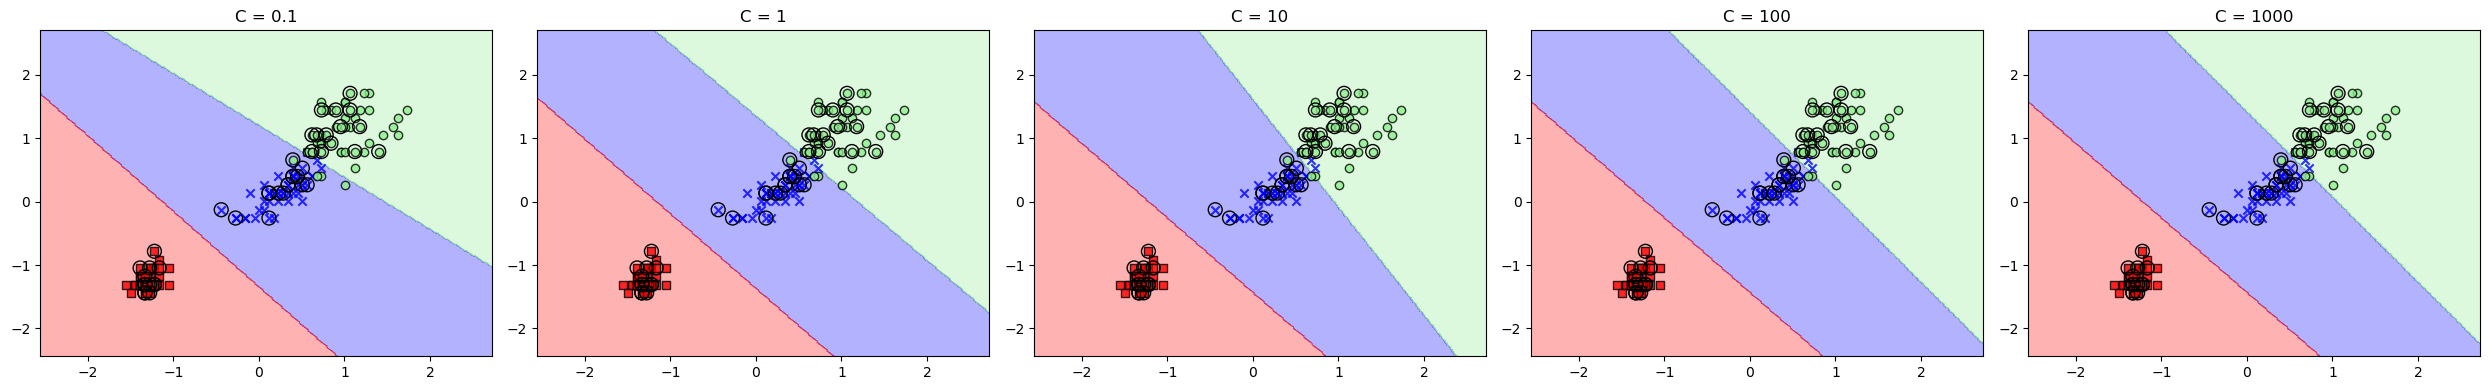

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# 데이터 로드 및 분할
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # 꽃잎 길이와 너비 특성만 사용
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)

# 데이터 표준화
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

# 결정 경계 시각화 함수
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, ax=None):
    if ax is None:
        ax = plt.gca()

    markers = ('s', 'x', 'o', '^', 'v')
    colors  = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f'Class {cl}',
            edgecolor='black'
        )

    if test_idx is not None:
        X_t, y_t = X[test_idx, :], y[test_idx]
        ax.scatter(
            X_t[:, 0],
            X_t[:, 1],
            c='none',
            edgecolor='black',
            alpha=1.0,
            linewidth=1,
            marker='o',
            s=100,
            label='test set'
        )

# C 값 변경에 따른 결정 경계 비교 함수
def compare_decision_boundaries(Cs):
    fig, axes = plt.subplots(1, len(Cs), figsize=(len(Cs) * 5, 4))
    for i, C in enumerate(Cs):
        # 선형 SVM 모델 생성 및 학습
        svm = SVC(kernel='linear', C=C, random_state=1)
        # (RBF 커널로 바꾸려면 아래 줄을 사용)
        # svm = SVC(kernel='rbf', C=C, random_state=1)
        svm.fit(X_train_std, y_train)

        # 시각화
        plot_decision_regions(
            X_combined_std, y_combined,
            classifier=svm,
            test_idx=range(105, 150),
            ax=axes[i]
        )
        axes[i].set_title(f"C = {C}")

    plt.tight_layout()
    plt.show()

# 데이터 결합
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined     = np.hstack((y_train, y_test))

# C 값 리스트에 따라 경계 확인
compare_decision_boundaries([0.1, 1, 10, 100, 1000])